# Data Gathering

In [135]:
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
%matplotlib inline

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [136]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [137]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [138]:
tweet_json = pd.read_json('tweet-json.zip', lines = True,encoding='utf-8')

# Data Assessment

## Visual Assessment

In [139]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [140]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [141]:
tweet_json

contributors  coordinates          created_at display_text_range  \
0              NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1              NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2              NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3              NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4              NaN          NaN 2017-07-29 16:00:24           [0, 138]   
5              NaN          NaN 2017-07-29 00:08:17           [0, 138]   
6              NaN          NaN 2017-07-28 16:27:12           [0, 140]   
7              NaN          NaN 2017-07-28 00:22:40           [0, 118]   
8              NaN          NaN 2017-07-27 16:25:51           [0, 122]   
9              NaN          NaN 2017-07-26 15:59:51           [0, 133]   
10             NaN          NaN 2017-07-26 00:31:25           [0, 130]   
11             NaN          NaN 2017-07-25 16:11:53           [0, 107]   
12             NaN          NaN 2017-07-25 01:55:32           [0, 106]   
13             NaN          NaN 2017-07-25 00:10:02            [0, 91]   
14             NaN          NaN 2017-07-24 17:02:04           [0, 118]   
15             NaN          NaN 2017-07-24 00:19:32           [0, 138]   
16             NaN          NaN 2017-07-23 00:22:39            [0, 86]   
17             NaN          NaN 2017-07-22 16:56:37           [0, 128]   
18             NaN          NaN 2017-07-22 00:23:06            [0, 87]   
19             NaN          NaN 2017-07-20 16:49:33           [0, 127]   
20             NaN          NaN 2017-07-19 16:06:48           [0, 127]   
21             NaN          NaN 2017-07-19 03:39:09           [0, 108]   
22             NaN          NaN 2017-07-19 00:47:34            [0, 99]   
23             NaN          NaN 2017-07-18 16:08:03            [0, 88]   
24             NaN          NaN 2017-07-18 00:07:08           [0, 129]   
25             NaN          NaN 2017-07-17 16:17:36           [0, 101]   
26             NaN          NaN 2017-07-16 23:58:41           [0, 121]   
27             NaN          NaN 2017-07-16 20:14:00            [0, 71]   
28             NaN          NaN 2017-07-15 23:25:31           [0, 131]   
29             NaN          NaN 2017-07-15 16:51:35          [27, 105]   
...            ...          ...                 ...                ...   
2324           NaN          NaN 2015-11-17 00:24:19           [0, 140]   
2325           NaN          NaN 2015-11-17 00:06:54           [0, 139]   
2326           NaN          NaN 2015-11-16 23:23:41           [0, 137]   
2327           NaN          NaN 2015-11-16 21:54:18            [0, 81]   
2328           NaN          NaN 2015-11-16 21:10:36           [0, 140]   
2329           NaN          NaN 2015-11-16 20:32:58           [0, 135]   
2330           NaN          NaN 2015-11-16 20:01:42           [0, 112]   
2331           NaN          NaN 2015-11-16 19:31:45           [0, 139]   
2332           NaN          NaN 2015-11-16 16:37:02           [0, 138]   
2333           NaN          NaN 2015-11-16 16:11:11           [0, 136]   
2334           NaN          NaN 2015-11-16 15:14:19            [0, 46]   
2335           NaN          NaN 2015-11-16 14:57:41            [0, 82]   
2336           NaN          NaN 2015-11-16 04:02:55           [0, 134]   
2337           NaN          NaN 2015-11-16 03:55:04           [0, 128]   
2338           NaN          NaN 2015-11-16 03:44:34           [0, 140]   
2339           NaN          NaN 2015-11-16 03:22:39           [0, 132]   
2340           NaN          NaN 2015-11-16 02:38:37           [0, 125]   
2341           NaN          NaN 2015-11-16 01:59:36           [0, 137]   
2342           NaN          NaN 2015-11-16 01:52:02           [0, 137]   
2343           NaN          NaN 2015-11-16 01:22:45           [0, 107]   
2344           NaN          NaN 2015-11-16 01:01:59           [0, 135]   
2345           NaN          NaN 2015-11-16 00:55:59           [0, 124]   
2346      

## Programmatic Assessment

In [142]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [143]:
twitter_archive[twitter_archive.text.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [144]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Daisy           7
an              7
Toby            7
Buddy           7
Bella           6
Leo             6
Jax             6
Oscar           6
Milo            6
Stanley         6
Jack            6
Scout           6
Koda            6
Rusty           6
Dave            6
Larry           5
             ... 
Aiden           1
Beebop          1
Stewie          1
Walker          1
Stuart          1
Lolo            1
Dylan           1
Ashleigh        1
Frönq           1
Jessifer        1
Jeffri          1
Toffee          1
Callie          1
Banditt         1
Yukon           1
Rizzo           1
Comet           1
Alf             1
Lucia           1
Tessa           1
Bruiser         1
Brandonald      1
Gustaf          1
Grady           1
Suki      

In [145]:
twitter_archive[twitter_archive['rating_numerator'] > 14 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
55    881633300179243008           8.816070e+17         4.738443e+07   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
285   838916489579200512                    NaN                  NaN   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
55    2017-07-02 21:58:53 +0000   
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
285   2017-03-07 00:57:32 +0000   
290   2017-03-04 22:12:52 +0000   
291   2017-03-04 17:56:49 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1663  2016-01-01 06:22:03 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
55    <a href="http://twitter.com/download/iphone" r...   
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
285   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
291   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twit

In [146]:
len(twitter_archive[twitter_archive['rating_denominator'] != 10 ])

23

In [147]:
len(twitter_archive[twitter_archive['rating_numerator'] > 14 ])

28

In [148]:
twitter_archive[twitter_archive['rating_denominator'] != 10 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [149]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [150]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
beagle                        18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [151]:
Rara_types = image_predictions.groupby('p1').filter(lambda x: len(x) < 2)

In [152]:
Rara_types

tweet_id                                            jpg_url  \
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
51    666983947667116034    https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg   
52    666996132027977728    https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg   
87    667524857454854144    https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg   
93    667549055577362432    https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg   
96    667724302356258817    https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg   
98    667766675769573376    https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg   
100   667782464991965184    https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg   
123   668226093875376128    https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg   
126   668256321989451776    https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg   
131   668297328638447616    https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg   
132   668466899341221888    https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg   
140   668544745690562560    https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg   
143   668620235289837568    https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg   
170   668992363537309700    https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg   
182   669351434509529089    https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg   
195   669583744538451968    https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg   
210   669993076832759809    https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg   
212   670037189829525505    https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg   
217   670069087419133954    https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg   
219   670079681849372674    https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg   
226   670361874861563904    https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg   
230   670408998013820928    https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg   
232   670417414769758208    https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg   
242   670449342516494336    https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg   
247   670668383499735048    https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg   
254   670733412878163972    https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg   
260   670783437142401025    https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg   
...                  ...                                                ...   
1551  793135492858580992    https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg   
1567  794205286408003585    https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg   
1622  803380650405482500    https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg   
1630  805487436403003392    https://pbs.twimg.com/media/Cy2qiTxXcAAtQBH.jpg   
1665  812503143955202048    https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg   
1688  815390420867969024    https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg   
1725  820078625395449857    https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg   
1747  823322678127919110    https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg   
1810  832769181346996225    https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg   
1831  836380477523124226    https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg   
1832  836677758902222849    https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg   
1833  836753516572119041    https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg   
1851  840370681858686976    https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg   
1856  841439858740625411    https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg   
1869  844580511645339650    https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg   
1887  847971574464610304    https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg   
1891  849051919805034497    https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg   
1902  851861385021730816    https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg   
1906  852311364735569921    https://pbs.twimg.com/media/C9QEqZ7XYA

In [153]:
len(Rara_types)

175

In [154]:
len(image_predictions.groupby('p2').filter(lambda x: len(x) < 2))

191

In [155]:
len(image_predictions.groupby('p3').filter(lambda x: len(x) < 2))

177

In [156]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [157]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [158]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [159]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [160]:
twitter_archive.sample(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
266  841833993020538882                    NaN                  NaN   

                     timestamp  \
266  2017-03-15 02:10:39 +0000   

                                                source  \
266  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
266  RT @dog_rates: This is Ken. His cheeks are mag...         8.174239e+17   

     retweeted_status_user_id retweeted_status_timestamp  \
266              4.196984e+09  2017-01-06 17:33:29 +0000   

                                         expanded_urls  rating_numerator  \
266  https://twitter.com/dog_rates/status/817423860...                13   

     rating_denominator name doggo floofer pupper puppo  
266                  10  Ken  None    None   None  None

In [161]:
twitter_archive[twitter_archive["tweet_id"] ==854010172552949000]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [162]:
tweet_json[tweet_json["id"] == 771171053431250945]

contributors  coordinates          created_at display_text_range  \
810           NaN          NaN 2016-09-01 02:21:21           [0, 112]   

                                              entities  \
810  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                     extended_entities  favorite_count  \
810  {'media': [{'id': 673320125483892736, 'id_str'...               0   

     favorited                                          full_text  geo  \
810      False  RT @dog_rates: This is Frankie. He's wearing b...  NaN   

                           ...                          \
810                        ...                           

     possibly_sensitive_appealable  quoted_status quoted_status_id  \
810                            0.0            NaN              NaN   

     quoted_status_id_str  retweet_count  retweeted  \
810                   NaN           8705      False   

                                      retweeted_status  \
810  {'created_at': 'Sun Dec 06 01:56:44 +0000 2015...   

                                                source truncated  \
810  <a href="http://twitter.com/download/iphone" r...     False   

                                                  user  
810  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[1 rows x 31 columns]

In [163]:
image_predictions[image_predictions["tweet_id"] == 771171053431250945]

tweet_id                                          jpg_url  \
1417  771171053431250945  https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   

      img_num       p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
1417        3  Samoyed  0.978833    True  Pomeranian  0.012763    True   

              p3   p3_conf  p3_dog  
1417  Eskimo_dog  0.001853    True

## Assessment
### Quality issues

#### twitter_archive table
- Columns (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)  are missing many values, therefore  we can analyze this table without these columns
- Missing records in the expanded_urls column (2297 non-null out of 2356)
- Erroneous data type (tweet_id , timestamp and rating_numerator)
- extract the decimal ratings from text to rating_numerator
- There are extreme values in rating_numerator( larger than 14)
- There are Erroneous values in rating_denominator( larger than 10)
- NaN values in name column represented by the word 'None'
- Drop unneeded columns
- Lowercase of some column "name"
- timestamp column needs to be separated to two columns (day column and time column).


#### image_predictions table
- 1532 True values and 543 False values of p1_dog column , 1553 True values and 522 False values of p2_dog column and 1499 True values and 576 False values of p3_dog column , the False values are probably not dogs
- Erroneous data type (tweet_id)
- There are strange values like car_wheel and can_opener that need to be checked in p3 column
- Drop unneeded columns
- The names of columns (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog) need to have appropriate descriptive names


#### tweet_json table
- There is no need to use columns like(coordinates , contributors , in_reply_to_screen_name , place , geo) to analyze.
- Erroneous data type (id)

### Tidiness issues

- Combining the columns doggo, puppo, pupper, floofer into a single column in twitter_archive table
- Merging the three data sets in one using tweet_id


## Data Cleaning

In [164]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
tweet_json = pd.read_json('tweet-json.zip', lines = True,encoding='utf-8')

## Copies of the original pieces of dataSet

In [165]:
Cleaned_twitter_archive = twitter_archive.copy()
Cleaned_image_predictions = image_predictions.copy()
Cleaned_tweet_json = tweet_json.copy()

### Define
- The columns (doggo, floofer, pupper and puppo) are values in column("dogs") and not separated columns.

In [166]:
Cleaned_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [167]:
Cleaned_twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [168]:
Cleaned_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [169]:
Cleaned_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Code

In [170]:
# handle none
Cleaned_twitter_archive.doggo.replace('None', '', inplace=True)
Cleaned_twitter_archive.floofer.replace('None', '', inplace=True)
Cleaned_twitter_archive.pupper.replace('None', '', inplace=True)
Cleaned_twitter_archive.puppo.replace('None', '', inplace=True)

# merge into column
Cleaned_twitter_archive['dogs'] = Cleaned_twitter_archive.doggo + Cleaned_twitter_archive.floofer + Cleaned_twitter_archive.pupper + Cleaned_twitter_archive.puppo

# handle multiple stages
Cleaned_twitter_archive.loc[Cleaned_twitter_archive.dogs == 'doggopupper', 'dogs'] = 'doggo, pupper'
Cleaned_twitter_archive.loc[Cleaned_twitter_archive.dogs == 'doggopuppo', 'dogs'] = 'doggo, puppo'
Cleaned_twitter_archive.loc[Cleaned_twitter_archive.dogs == 'doggofloofer', 'dogs'] = 'doggo, floofer'

# handle missing values
Cleaned_twitter_archive.loc[Cleaned_twitter_archive.dogs == '', 'dogs'] = np.nan

### Test

In [171]:
Cleaned_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

### Define
- Change erroneous data type (tweet_id , timestamp and rating_numerator)

### Code

In [172]:
Cleaned_twitter_archive.timestamp = Cleaned_twitter_archive.timestamp.apply(pd.to_datetime)
Cleaned_twitter_archive["tweet_id"] = Cleaned_twitter_archive['tweet_id'].astype(str)
Cleaned_twitter_archive["rating_numerator"] = Cleaned_twitter_archive['rating_numerator'].astype(float)

### Test

In [173]:
Cleaned_twitter_archive.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dogs                                  object
dtype: object

### Define
- Change timestamp column to be separated in to two columns (day column and time column)

### Code

In [174]:
Cleaned_twitter_archive['Day'] = [day.date() for day in Cleaned_twitter_archive['timestamp']]
Cleaned_twitter_archive['Time'] = [time.time() for time in Cleaned_twitter_archive['timestamp']]

### Test

In [175]:
Cleaned_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [176]:
Cleaned_image_predictions.sample(1)

tweet_id                                          jpg_url  \
1079  717841801130979328  https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg   

      img_num                p1   p1_conf  p1_dog                p2   p2_conf  \
1079        1  Brittany_spaniel  0.922876    True  English_springer  0.070113   

      p2_dog          p3   p3_conf  p3_dog  
1079    True  bath_towel  0.002561   False

### Define
-  Change the names of columns (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog) need to appropriate descriptive names

### Code

In [177]:
Cleaned_image_predictions = Cleaned_image_predictions.rename(columns={"p1": "prediction_1","p1_conf":"prediction_1_confidence" ,"p1_dog":"prediction_1_dog" ,"p2": "prediction_2","p2_conf":"prediction_2_confidence" ,"p2_dog":"prediction_2_dog" , "p3": "prediction_3" , "p3_conf":"prediction_3_confidence" ,"p3_dog":"prediction_3_dog"})

### Test

In [178]:
Cleaned_image_predictions.sample(3)

tweet_id                                          jpg_url  \
1980  871032628920680449  https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg   
1610  801167903437357056  https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1023  710283270106132480  https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg   

      img_num    prediction_1  prediction_1_confidence  prediction_1_dog  \
1980        1          kelpie                 0.398053              True   
1610        1  cocker_spaniel                 0.740220              True   
1023        2        Shih-Tzu                 0.932401              True   

        prediction_2  prediction_2_confidence  prediction_2_dog  \
1980         macaque                 0.068955             False   
1610  Dandie_Dinmont                 0.061604              True   
1023           Lhasa                 0.030806              True   

         prediction_3  prediction_3_confidence  prediction_3_dog  
1980            dingo                 0.050602             False  
1610   English_setter                 0.041331              True  
1023  Tibetan_terrier                 0.008974              True

In [179]:
Cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dogs                 

### Define
- Drop Columns (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp , expanded_urls , source , timestamp ,  ) as some of them are missing many values, and others we can analyze this table without them

### Code

In [180]:
Cleaned_twitter_archive = Cleaned_twitter_archive.drop(["doggo","floofer","pupper","puppo","in_reply_to_status_id" , "in_reply_to_user_id" , "retweeted_status_id" , "retweeted_status_user_id" , "retweeted_status_timestamp" , "expanded_urls" , "source" , "timestamp"], axis=1)

### Test

In [181]:
Cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dogs                  380 non-null object
Day                   2356 non-null object
Time                  2356 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 147.3+ KB


### Define
- Extract the decimal ratings from text to rating_numerator

### Code

In [187]:
Cleaned_twitter_archive['rating_numerator'] = Cleaned_twitter_archive['text'].str.extract("(\d*\.?\d+)", expand=True)

### Test

In [200]:
Cleaned_twitter_archive["rating_numerator"] = Cleaned_twitter_archive['rating_numerator'].astype(float)
Cleaned_twitter_archive.rating_numerator.value_counts()

12.00    544
10.00    487
11.00    438
13.00    341
9.00     146
8.00     103
7.00      51
14.00     50
6.00      35
5.00      34
2.00      27
3.00      27
4.00      24
1.00      14
0.10      10
0.00       7
0.11       4
0.90       3
9.75       2
9.50       1
11.26      1
0.13       1
11.27      1
8.98       1
0.12       1
0.30       1
13.50      1
0.80       1
Name: rating_numerator, dtype: int64

### Define
- Change the extreme values in rating_numerator( larger than 14) to 10 .

### Code

In [201]:
Cleaned_twitter_archive.loc[Cleaned_twitter_archive["rating_numerator"] > 14.0 , ["rating_numerator"]] = 10.0


In [202]:
Cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dogs                  380 non-null object
Day                   2356 non-null object
Time                  2356 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 147.3+ KB


### Test

In [203]:
len(Cleaned_twitter_archive[Cleaned_twitter_archive['rating_numerator'] > 14 ])

0

### Define
- Change Erroneous values in rating_denominator( any number but 10) to 10 .

### Code

In [204]:
Cleaned_twitter_archive.loc[Cleaned_twitter_archive["rating_denominator"] != 10 , ["rating_denominator"]] = 10


### Test

In [205]:
len(Cleaned_twitter_archive[Cleaned_twitter_archive['rating_denominator'] != 10 ])

0

### Define
- Change None values in name column to np.NaN

### Code

In [206]:
Cleaned_twitter_archive["name"].replace("None" , np.nan ,inplace=True)


### Test

In [207]:
Cleaned_twitter_archive.sample(5)

tweet_id                                               text  \
915   757354760399941633  This is Devón (pronounced "Eric"). He forgot h...   
643   793195938047070209  Say hello to Lily. She's pupset that her costu...   
577   800855607700029440  RT @Lin_Manuel: 11/10 would recommend. https:/...   
1774  678023323247357953  After getting lost in Reese's eyes for several...   
1284  708479650088034305  Meet Bear. He's a Beneboop Cumberclap. Extreme...   

      rating_numerator  rating_denominator   name   dogs         Day      Time  
915                8.0                  10  Devón    NaN  2016-07-24  23:20:20  
643               12.0                  10   Lily  puppo  2016-10-31  21:00:23  
577               11.0                  10    NaN    NaN  2016-11-22  00:17:10  
1774              13.0                  10    NaN    NaN  2015-12-19  01:25:31  
1284              13.0                  10   Bear    NaN  2016-03-12  02:28:06

### Define
- Change to uppercase of some column "name"

### Code

In [208]:
Cleaned_twitter_archive["name"] = Cleaned_twitter_archive["name"].str.capitalize()

### Test

In [209]:
Cleaned_twitter_archive

tweet_id                                               text  \
0     892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1     892177421306343426  This is Tilly. She's just checking pup on you....   
2     891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3     891689557279858688  This is Darla. She commenced a snooze mid meal...   
4     891327558926688256  This is Franklin. He would like you to stop ca...   
5     891087950875897856  Here we have a majestic great white breaching ...   
6     890971913173991426  Meet Jax. He enjoys ice cream so much he gets ...   
7     890729181411237888  When you watch your owner call another dog a g...   
8     890609185150312448  This is Zoey. She doesn't want to be one of th...   
9     890240255349198849  This is Cassie. She is a college pup. Studying...   
10    890006608113172480  This is Koda. He is a South Australian decksha...   
11    889880896479866881  This is Bruno. He is a service shark. Only get...   
12    889665388333682689  Here's a puppo that seems to be on the fence a...   
13    889638837579907072  This is Ted. He does his best. Sometimes that'...   
14    889531135344209921  This is Stuart. He's sporting his favorite fan...   
15    889278841981685760  This is Oliver. You're witnessing one of his m...   
16    888917238123831296  This is Jim. He found a fren. Taught him how t...   
17    888804989199671297  This is Zeke. He has a new stick. Very proud o...   
18    888554962724278272  This is Ralphus. He's powering up. Attempting ...   
19    888202515573088257  RT @dog_rates: This is Canela. She attempted s...   
20    888078434458587136  This is Gerald. He was just told he didn't get...   
21    887705289381826560  This is Jeffrey. He has a monopoly on the pool...   
22    887517139158093824  I've yet to rate a Venezuelan Hover Wiener. Th...   
23    887473957103951883  This is Canela. She attempted some fancy porch...   
24    887343217045368832  You may not have known you needed to see this ...   
25    887101392804085760  This... is a Jubilant Antarctic House Bear. We...   
26    886983233522544640  This is Maya. She's very shy. Rarely leaves he...   
27    886736880519319552  This is Mingus. He's a wonderful father to his...   
28    886680336477933568  This is Derek. He's late for a dog meeting. 13...   
29    886366144734445568  This is Roscoe. Another pupper fallen victim t...   
...                  ...                                                ...   
2326  666411507551481857  This is quite the dog. Gets really excited whe...   
2327  666407126856765440  This is a southern Vesuvius bumblegruff. Can d...   
2328  666396247373291520  Oh goodness. A super rare northeast Qdoba kang...   
2329  666373753744588802  Those are sunglasses and a jean jacket. 11/10 ...   
2330  666362758909284353  Unique dog here. Very small. Lives in containe...   
2331  666353288456101888  Here we have a mixed Asiago from the Galápagos...   
2332  666345417576210432  Look at this jokester thinking seat belt laws ...   
2333  666337882303524864  This is an extremely rare horned Parthenon. No...   
2334  666293911632134144  This is a funny dog. Weird toes. Won't come do...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   
2336  666273097616637952     Can take selfies 11/10 https://t.co/ws2AMaNwPW   
2337  666268910803644416  Very concerned about fellow dog trapped in com...   
2338  666104133288665088  Not familiar with this breed. No tail (weird)....   
2339  666102155909144576  Oh my. Here you are seeing an Adobe Setter giv...   
2340  666099513787052032  Can stand on stump for what seems like a while...   
2341  666094000022159362  This appears to be a Mongolian Presbyterian mi...   
2342  666082916733198337  Here we have a well-established sunblockerspan...   
2343  666073100786774016  Let's hope this flight isn't Malaysian (lol). ...   
2344  666071193221509120  Here we have a northern speckled Rhodode

### Define
- Filter 1532 True values of prediction_1_dog column , 1553 True values of prediction_2_dog column and 1499 True values and of prediction_3_dog column 

### Code

In [210]:
Cleaned_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null int64
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_dog           2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_dog           2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confidence    2075 non-null float64
prediction_3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [211]:
Cleaned_image_predictions=Cleaned_image_predictions[Cleaned_image_predictions["prediction_1_dog"]==True]
Cleaned_image_predictions=Cleaned_image_predictions[Cleaned_image_predictions["prediction_2_dog"]==True]
Cleaned_image_predictions=Cleaned_image_predictions[Cleaned_image_predictions["prediction_3_dog"]==True]

### Test

In [212]:
Cleaned_image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
...                  ...                                                ...   
2034  883838122936631299    https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg   
2035  884162670584377345    https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   
2036  884441805382717440    https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg   
2037  884562892145688576    https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg   
2038  884876753390489601    https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg   
2039  884925521741709313    https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg   
2040  885167619883638784    https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg   
2042  885528943205470208    https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg   
2043  885984800019947520    https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQA

### Define
- Check strange values like car_wheel and can_opener if there are still exist in p3 (prediction_3) column

### Code

In [213]:
Cleaned_image_predictions[Cleaned_image_predictions["prediction_3"]=="car_wheel"]


Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, prediction_1, prediction_1_confidence, prediction_1_dog, prediction_2, prediction_2_confidence, prediction_2_dog, prediction_3, prediction_3_confidence, prediction_3_dog]
Index: []

In [214]:
Cleaned_image_predictions[Cleaned_image_predictions["prediction_3"]=="can_opener"]


Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, prediction_1, prediction_1_confidence, prediction_1_dog, prediction_2, prediction_2_confidence, prediction_2_dog, prediction_3, prediction_3_confidence, prediction_3_dog]
Index: []

### Test

In [215]:
assert[Cleaned_image_predictions[Cleaned_image_predictions["prediction_3"]=="car_wheel"] == False]


In [216]:
assert[Cleaned_image_predictions[Cleaned_image_predictions["prediction_3"]=="can_opener"] == False]

### Define
- Change datatype of (tweet_id) to str

### Code

In [217]:
Cleaned_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id                   1243 non-null int64
jpg_url                    1243 non-null object
img_num                    1243 non-null int64
prediction_1               1243 non-null object
prediction_1_confidence    1243 non-null float64
prediction_1_dog           1243 non-null bool
prediction_2               1243 non-null object
prediction_2_confidence    1243 non-null float64
prediction_2_dog           1243 non-null bool
prediction_3               1243 non-null object
prediction_3_confidence    1243 non-null float64
prediction_3_dog           1243 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


In [218]:
Cleaned_image_predictions["tweet_id"] = Cleaned_image_predictions['tweet_id'].astype(str)

### Test

In [219]:
Cleaned_image_predictions.dtypes

tweet_id                    object
jpg_url                     object
img_num                      int64
prediction_1                object
prediction_1_confidence    float64
prediction_1_dog              bool
prediction_2                object
prediction_2_confidence    float64
prediction_2_dog              bool
prediction_3                object
prediction_3_confidence    float64
prediction_3_dog              bool
dtype: object

### Define
- Drop unneeded columns

### Code

In [220]:
Cleaned_image_predictions = Cleaned_image_predictions.drop(["img_num"], axis=1)

### Test

In [221]:
Cleaned_image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
...                  ...                                                ...   
2034  883838122936631299    https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg   
2035  884162670584377345    https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   
2036  884441805382717440    https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg   
2037  884562892145688576    https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg   
2038  884876753390489601    https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg   
2039  884925521741709313    https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg   
2040  885167619883638784    https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg   
2042  885528943205470208    https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg   
2043  885984800019947520    https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQA

### Define
- Drop columns (coordinates , contributors , in_reply_to_screen_name , in_reply_to_status_id , in_reply_to_status_id_str,quoted_status_id_str,truncated ,retweeted,quoted_status, is_quote_status,in_reply_to_user_id_str ,created_at, in_reply_to_user_id , place , geo , favorited , id_str) .

### Code

In [222]:
Cleaned_tweet_json.sample(1)

contributors  coordinates          created_at display_text_range  \
1733           NaN          NaN 2015-12-23 18:25:38           [0, 140]   

                                               entities  \
1733  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  favorite_count  \
1733  {'media': [{'id': 679729589501865985, 'id_str'...            2367   

      favorited                                          full_text  geo  \
1733      False  This is Hunter. He was playing with his ball m...  NaN   

                            ...                          \
1733                        ...                           

      possibly_sensitive_appealable  quoted_status quoted_status_id  \
1733                            0.0            NaN              NaN   

      quoted_status_id_str  retweet_count  retweeted  retweeted_status  \
1733                   NaN            937      False               NaN   

                                                 source truncated  \
1733  <a href="http://twitter.com/download/iphone" r...     False   

                                                   user  
1733  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[1 rows x 31 columns]

In [223]:
Cleaned_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [224]:
Cleaned_tweet_json = Cleaned_tweet_json.drop(["coordinates","entities","display_text_range" ,"created_at","lang","quoted_status_id", "possibly_sensitive","possibly_sensitive_appealable","contributors" ,"retweeted_status", "in_reply_to_screen_name" , "in_reply_to_status_id" , "in_reply_to_status_id_str","quoted_status_id_str","truncated" ,"retweeted","quoted_status", "is_quote_status","in_reply_to_user_id_str" , "in_reply_to_user_id" , "place" , "geo" , "favorited" , "id_str"], axis=1)

### Test

In [225]:
Cleaned_tweet_json.sample(3)

extended_entities  favorite_count  \
1952  {'media': [{'id': 673656255106441220, 'id_str'...             769   
1602  {'media': [{'id': 685906717385854977, 'id_str'...            8277   
1990  {'media': [{'id': 672614739944595456, 'id_str'...            1302   

                                              full_text                  id  \
1952  This is Albert AKA King Banana Peel. He's a ki...  673656262056419329   
1602  This is Olive. He's stuck in a sleeve. 9/10 da...  685906723014619143   
1990  This is Norman. Doesn't bark much. Very docile...  672614745925664768   

      retweet_count                                             source  \
1952            265  <a href="http://twitter.com/download/iphone" r...   
1602           3303  <a href="http://twitter.com/download/iphone" r...   
1990            644  <a href="http://twitter.com/download/iphone" r...   

                                                   user  
1952  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1602  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1990  {'id': 4196983835, 'id_str': '4196983835', 'na...

In [226]:
Cleaned_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null int64
retweet_count        2354 non-null int64
source               2354 non-null object
user                 2354 non-null object
dtypes: int64(3), object(4)
memory usage: 128.8+ KB


### Define
- Change datatype of (id) column

### Code

In [227]:
Cleaned_tweet_json["id"] = Cleaned_tweet_json['id'].astype(str)

### Test

In [228]:
Cleaned_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
id                   2354 non-null object
retweet_count        2354 non-null int64
source               2354 non-null object
user                 2354 non-null object
dtypes: int64(2), object(5)
memory usage: 128.8+ KB


### Define 
- Mereg all tables usig tweet_id

### Code

In [229]:
Cleaned_tweet_json = Cleaned_tweet_json.rename(columns={"id": "tweet_id"})

In [230]:
Cleaned_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
extended_entities    2073 non-null object
favorite_count       2354 non-null int64
full_text            2354 non-null object
tweet_id             2354 non-null object
retweet_count        2354 non-null int64
source               2354 non-null object
user                 2354 non-null object
dtypes: int64(2), object(5)
memory usage: 128.8+ KB


In [231]:
AllTweets_df = pd.merge(Cleaned_twitter_archive, Cleaned_image_predictions, how='outer', on=['tweet_id'])
AllTweets_df = pd.merge(AllTweets_df, Cleaned_tweet_json, how = 'outer', on=['tweet_id'])


### Test

In [232]:
AllTweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                   2356 non-null object
text                       2356 non-null object
rating_numerator           2356 non-null float64
rating_denominator         2356 non-null int64
name                       1611 non-null object
dogs                       380 non-null object
Day                        2356 non-null object
Time                       2356 non-null object
jpg_url                    1243 non-null object
prediction_1               1243 non-null object
prediction_1_confidence    1243 non-null float64
prediction_1_dog           1243 non-null object
prediction_2               1243 non-null object
prediction_2_confidence    1243 non-null float64
prediction_2_dog           1243 non-null object
prediction_3               1243 non-null object
prediction_3_confidence    1243 non-null float64
prediction_3_dog           1243 non-null object
extended_entities          

In [233]:
#Saving AllTweets_df as csv
AllTweets_df.to_csv("twitter_archive_master.csv")

## Analyzing AllTweets_df DataSet

In [79]:
Tweets_df= pd.read_csv('twitter_archive_master.csv')

In [80]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
Unnamed: 0                 2356 non-null int64
tweet_id                   2356 non-null int64
text                       2356 non-null object
rating_numerator           2356 non-null int64
rating_denominator         2356 non-null int64
name                       1611 non-null object
dogs                       380 non-null object
Day                        2356 non-null object
Time                       2356 non-null object
jpg_url                    1243 non-null object
prediction_1               1243 non-null object
prediction_1_confidence    1243 non-null float64
prediction_1_dog           1243 non-null object
prediction_2               1243 non-null object
prediction_2_confidence    1243 non-null float64
prediction_2_dog           1243 non-null object
prediction_3               1243 non-null object
prediction_3_confidence    1243 non-null float64
prediction_3_dog           1243

In [81]:
Tweets_df = Tweets_df[Tweets_df[['prediction_1_dog', 'prediction_2_dog', 'prediction_3_dog']].notnull().all(1)]


In [82]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 1 to 2355
Data columns (total 25 columns):
Unnamed: 0                 1243 non-null int64
tweet_id                   1243 non-null int64
text                       1243 non-null object
rating_numerator           1243 non-null int64
rating_denominator         1243 non-null int64
name                       934 non-null object
dogs                       197 non-null object
Day                        1243 non-null object
Time                       1243 non-null object
jpg_url                    1243 non-null object
prediction_1               1243 non-null object
prediction_1_confidence    1243 non-null float64
prediction_1_dog           1243 non-null object
prediction_2               1243 non-null object
prediction_2_confidence    1243 non-null float64
prediction_2_dog           1243 non-null object
prediction_3               1243 non-null object
prediction_3_confidence    1243 non-null float64
prediction_3_dog           1243 

In [83]:
Tweets_df

Unnamed: 0            tweet_id  \
1              1  892177421306343426   
2              2  891815181378084864   
4              4  891327558926688256   
7              7  890729181411237888   
8              8  890609185150312448   
9              9  890240255349198849   
10            10  890006608113172480   
12            12  889665388333682689   
13            13  889638837579907072   
14            14  889531135344209921   
15            15  889278841981685760   
16            16  888917238123831296   
17            17  888804989199671297   
18            18  888554962724278272   
19            19  888202515573088257   
20            20  888078434458587136   
21            21  887705289381826560   
23            23  887473957103951883   
25            25  887101392804085760   
27            27  886736880519319552   
29            29  886366144734445568   
33            33  885984800019947520   
34            34  885528943205470208   
37            37  885167619883638784   
38            38  884925521741709313   
39            39  884876753390489601   
40            40  884562892145688576   
41            41  884441805382717440   
43            43  884162670584377345   
44            44  883838122936631299   
...          ...                 ...   
2315        2315  666691418707132416   
2316        2316  666649482315059201   
2317        2317  666644823164719104   
2318        2318  666454714377183233   
2319        2319  666447344410484738   
2320        2320  666437273139982337   
2323        2323  666428276349472768   
2324        2324  666421158376562688   
2325        2325  666418789513326592   
2327        2327  666407126856765440   
2328        2328  666396247373291520   
2329        2329  666373753744588802   
2331        2331  666353288456101888   
2332        2332  666345417576210432   
2335        2335  666287406224695296   
2336        2336  666273097616637952   
2339        2339  666102155909144576   
2340        2340  666099513787052032   
2341        2341  666094000022159362   
2342        2342  666082916733198337   
2343        2343  666073100786774016   
2344        2344  666071193221509120   
2345        2345  666063827256086533   
2346        2346  666058600524156928   
2350        2350  666050758794694657   
2351        2351  666049248165822465   
2352        2352  666044226329800704   
2353        2353  666033412701032449   
2354        2354  666029285002620928   
2355        2355  666020888022790149   

                                                   text  rating_numerator  \
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
4     This is Franklin. He would like you to stop ca...                12   
7     When you watch your owner call another dog a g...                13   
8     This is Zoey. She doesn't want to be one of th...                13   
9     This is Cassie. She is a college pup. Studying...                14   
10    This is Koda. He is a South Australian decksha...                13   
12    Here's a puppo that seems to be on the fence a...                13   
13    This is Ted. He does his best. Sometimes that'...                12   
14    This is Stuart. He's sporting his favorite fan...                13   
15    This is Oliver. You're witnessing one of his m...                13   
16    This is Jim. He found a fren. Taught him how t...                12   
17    This is Zeke. He has a new stick. Very proud o...                13   
18    This is Ralphus. He's powering up. Attempting ...                13   
19    RT @dog_rates: This is Canela. She attempted s...                13   
20    This is Gerald. He was just told he didn't get...                12   
21    This is Jeffrey. He has a monopoly on the pool...                13   
23    This is Canela. She attempted some fancy porch...                13   
25    This... is a Jubilant Antarctic House Bear. We...       

## Insights:
- 1- Calculate the mean and median for the predictions 'prediction_1_confidence', 'prediction_2_confidence' and 'prediction_3_confidence'
- 2- Describe the data records of 'prediction_1_confidence', 'prediction_2_confidence' and 'prediction_3_confidence' distributed
- 3- Extract the names of the dogs with the highest prediction rates of 'prediction_1_confidence', 'prediction_2_confidence' and 'prediction_3_confidence' with the doge image , retweet_count , favorite_count , text and prediction_1(breed of dog)

## prediction_1 analysis

In [84]:
#Statistics
Tweets_df["prediction_1_confidence"].describe()

count    1243.000000
mean        0.627221
std         0.252872
min         0.044333
25%         0.416577
50%         0.631501
75%         0.853345
max         0.999885
Name: prediction_1_confidence, dtype: float64

In [85]:
#Median
Tweets_df["prediction_1_confidence"].median()

0.631501

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


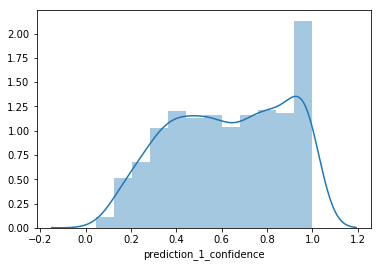

In [86]:
ax = plt.subplots()
ax = sns.distplot(Tweets_df["prediction_1_confidence"])
#display(fig)

### comment : This is Negative/left skew which means that the data is mostly high values, long left tail.

In [87]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 1 to 2355
Data columns (total 25 columns):
Unnamed: 0                 1243 non-null int64
tweet_id                   1243 non-null int64
text                       1243 non-null object
rating_numerator           1243 non-null int64
rating_denominator         1243 non-null int64
name                       934 non-null object
dogs                       197 non-null object
Day                        1243 non-null object
Time                       1243 non-null object
jpg_url                    1243 non-null object
prediction_1               1243 non-null object
prediction_1_confidence    1243 non-null float64
prediction_1_dog           1243 non-null object
prediction_2               1243 non-null object
prediction_2_confidence    1243 non-null float64
prediction_2_dog           1243 non-null object
prediction_3               1243 non-null object
prediction_3_confidence    1243 non-null float64
prediction_3_dog           1243 

In [88]:
#The name
Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["name"].get_values()[0]

nan

Populating the interactive namespace from numpy and matplotlib


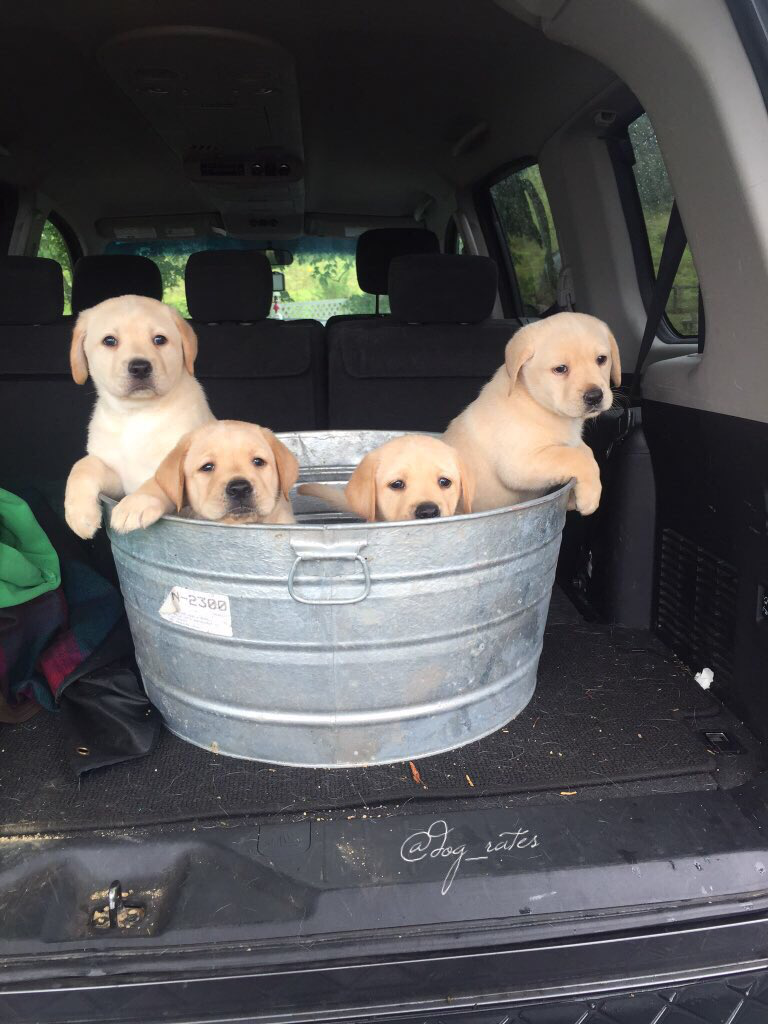

In [89]:
#The image
%pylab inline
from PIL import Image
import requests
from io import BytesIO

response = requests.get(Tweets_df[Tweets_df["prediction_1_confidence"] == Tweets_df["prediction_1_confidence"].max()]["jpg_url"].get_values()[0])
Image.open(BytesIO(response.content))

In [90]:
#retweet_count
int(Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["retweet_count"].get_values()[0])


1552

In [91]:
#favorite_count
int(Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["favorite_count"].get_values()[0])

3748

In [92]:
#text
Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["text"].get_values()[0]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [93]:
# breed of dog 
Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["prediction_1"].get_values()[0]

'Labrador_retriever'

## prediction_2 analysis

In [94]:
#Statistics
Tweets_df["prediction_2_confidence"].describe()

count    1243.000000
mean        0.143309
std         0.103886
min         0.000056
25%         0.055778
50%         0.130726
75%         0.207010
max         0.467678
Name: prediction_2_confidence, dtype: float64

In [95]:
#Median
Tweets_df["prediction_2_confidence"].median()

0.130726

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


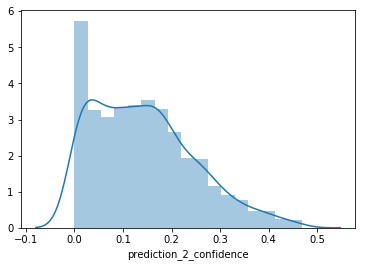

In [96]:
ax = plt.subplots()
ax = sns.distplot(Tweets_df["prediction_2_confidence"])

### comment : This is Positive/right skew which means that the data is mostly low values, long right tail.

In [97]:
#The name
Tweets_df[Tweets_df.prediction_2_confidence == Tweets_df["prediction_2_confidence"].max()]["name"].get_values()[0]

'Pablo'

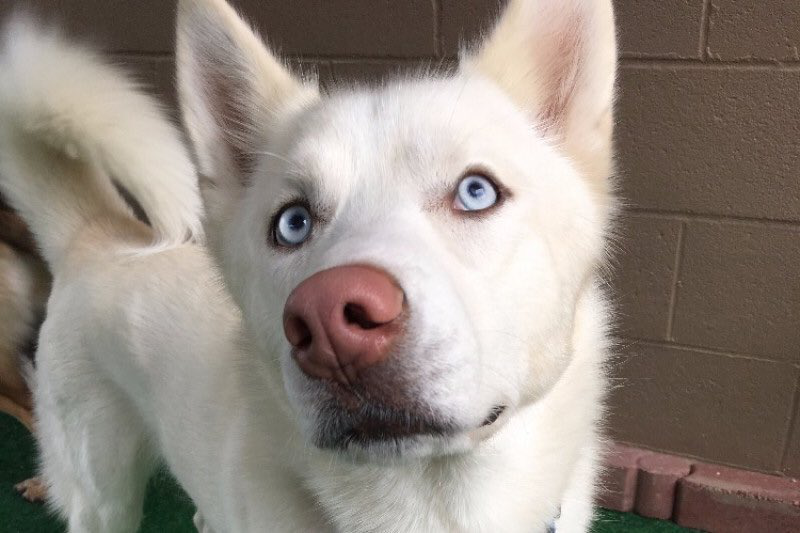

In [98]:
#The image
response = requests.get(Tweets_df[Tweets_df["prediction_2_confidence"] == Tweets_df["prediction_2_confidence"].max()]["jpg_url"].get_values()[0])
Image.open(BytesIO(response.content))

In [99]:
#retweet_count
int(Tweets_df[Tweets_df.prediction_2_confidence == Tweets_df["prediction_2_confidence"].max()]["retweet_count"].get_values()[0])


1483

In [100]:
#favorite_count
int(Tweets_df[Tweets_df.prediction_1_confidence == Tweets_df["prediction_1_confidence"].max()]["favorite_count"].get_values()[0])

3748

In [101]:
#text
Tweets_df[Tweets_df.prediction_2_confidence == Tweets_df["prediction_2_confidence"].max()]["text"].get_values()[0]

"Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\r\n\r\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc"

In [102]:
# breed of dog 
Tweets_df[Tweets_df.prediction_2_confidence == Tweets_df["prediction_2_confidence"].max()]["prediction_2"].get_values()[0]

'Siberian_husky'

## prediction_3 analysis

In [103]:
#Statistics
Tweets_df["prediction_3_confidence"].describe()

count    1243.000000
mean        0.061627
std         0.053017
min         0.000008
25%         0.015731
50%         0.048666
75%         0.095207
max         0.273419
Name: prediction_3_confidence, dtype: float64

In [104]:
#Median
Tweets_df["prediction_3_confidence"].median()

0.0486655

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


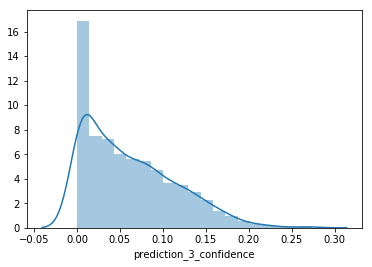

In [105]:
ax = plt.subplots()
ax = sns.distplot(Tweets_df["prediction_3_confidence"])

### comment : This is too Positive/right skew which means that the data is mostly low values, long right tail.

In [106]:
#The name
Tweets_df[Tweets_df.prediction_3_confidence == Tweets_df["prediction_3_confidence"].max()]["name"].get_values()[0]

'Bluebert'

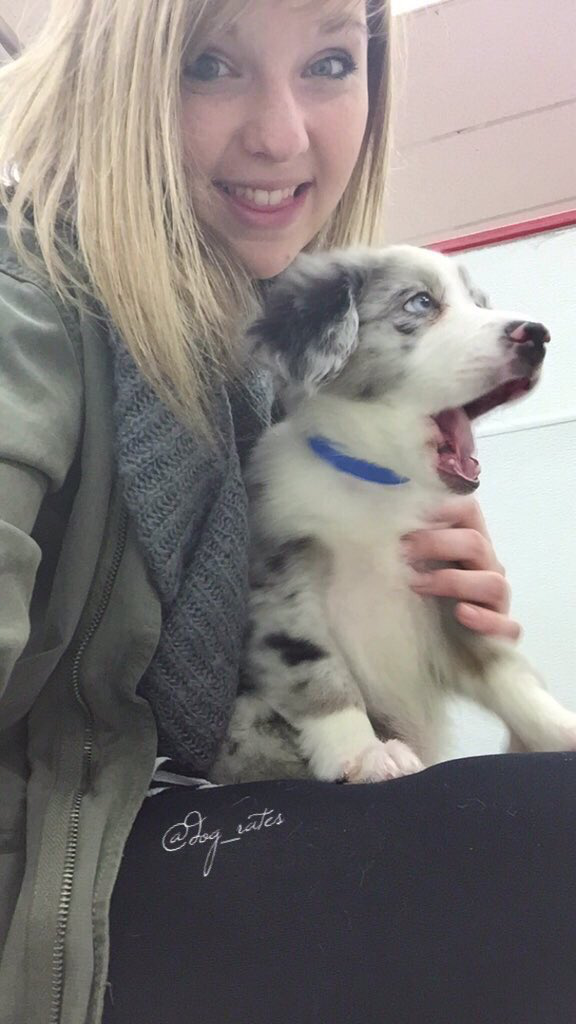

In [107]:
#The image
response = requests.get(Tweets_df[Tweets_df["prediction_3_confidence"] == Tweets_df["prediction_3_confidence"].max()]["jpg_url"].get_values()[0])
Image.open(BytesIO(response.content))

In [108]:
#retweet_count
int(Tweets_df[Tweets_df.prediction_3_confidence == Tweets_df["prediction_3_confidence"].max()]["retweet_count"].get_values()[0])


247

In [109]:
#favorite_count
int(Tweets_df[Tweets_df.prediction_3_confidence == Tweets_df["prediction_3_confidence"].max()]["favorite_count"].get_values()[0])

2574

In [110]:
#text
Tweets_df[Tweets_df.prediction_3_confidence == Tweets_df["prediction_3_confidence"].max()]["text"].get_values()[0]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [111]:
# breed of dog 
Tweets_df[Tweets_df.prediction_3_confidence == Tweets_df["prediction_3_confidence"].max()]["prediction_3"].get_values()[0]

'Eskimo_dog'

## Visualizing the three confidences of dataset

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


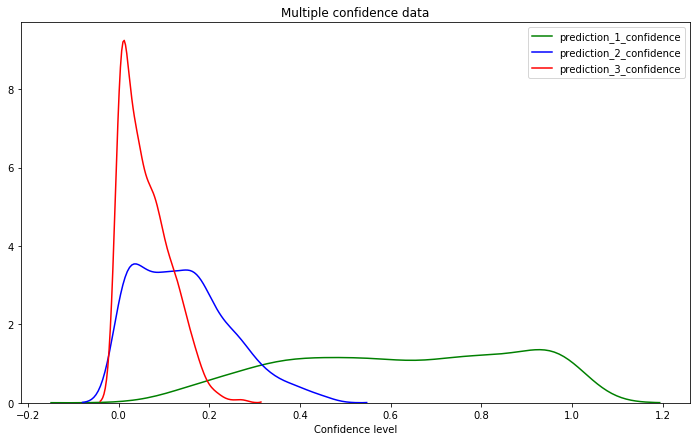

In [145]:
# Plot three histograms
sns.distplot(Tweets_df["prediction_1_confidence"], hist=False, color="green", label="prediction_1_confidence")
sns.distplot(Tweets_df["prediction_2_confidence"], hist=False, color="blue", label="prediction_2_confidence")
sns.distplot(Tweets_df["prediction_3_confidence"], hist=False, color="red", label="prediction_3_confidence")
plt.rcParams['figure.figsize']=(10,7)
plt.title('Multiple confidence data')
plt.xlabel('Confidence level')
plt.legend()
plt.show()

## Visualizing the dogs breeds 1 of dataset

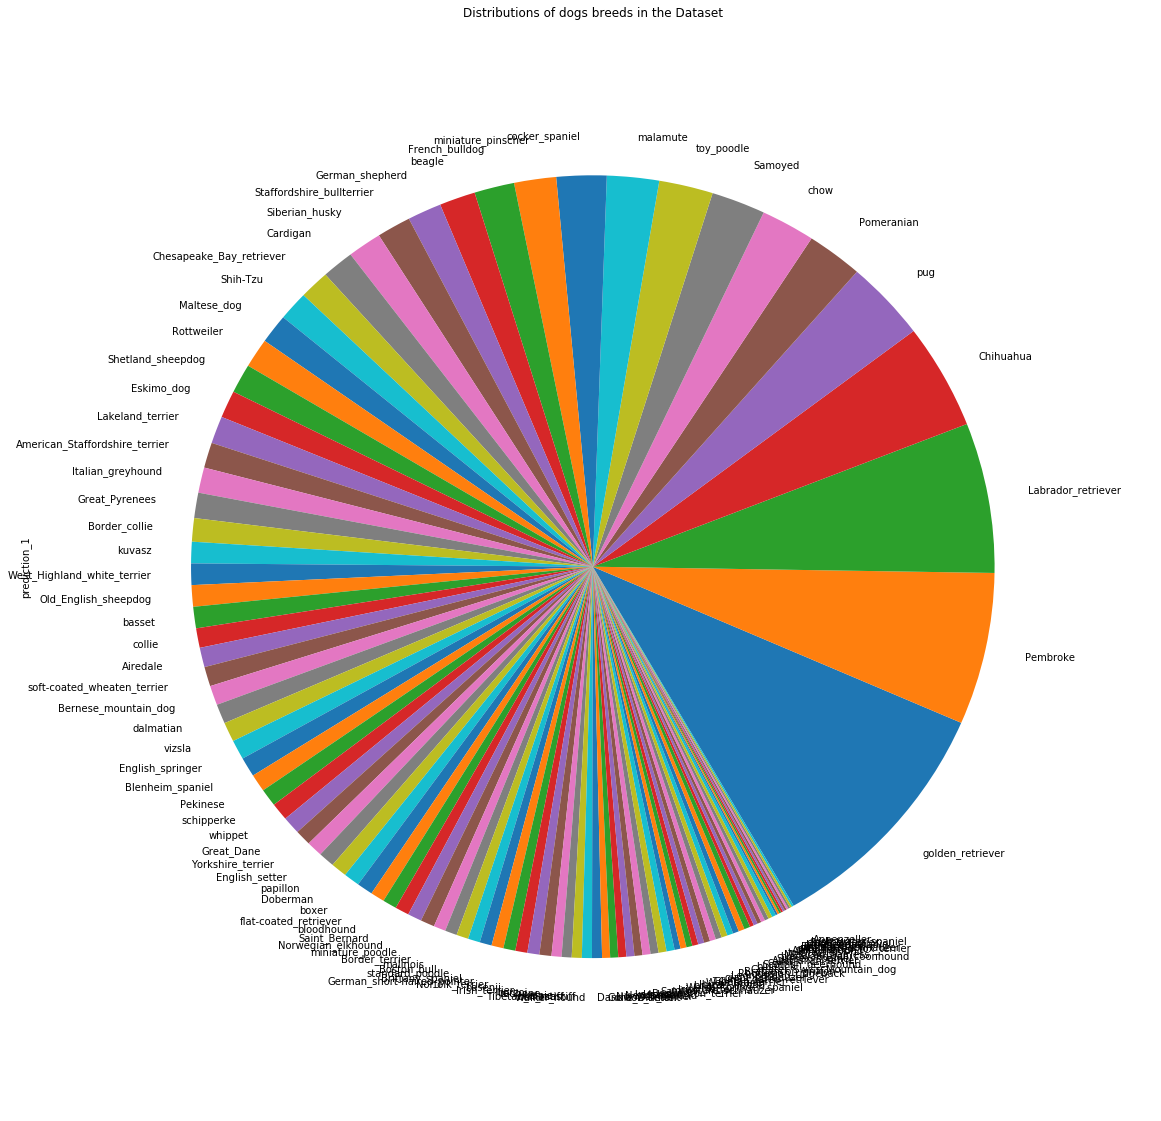

In [130]:
plt.rcParams['figure.figsize']=(20,20)

Tweets_df.prediction_1.value_counts(sort=True).plot.pie(startangle=300, pctdistance=0.9, radius = 0.9)
plt.title('Distributions of dogs breeds in the Dataset')
plt.show()

## Visualizing the dogs breeds 2 of dataset

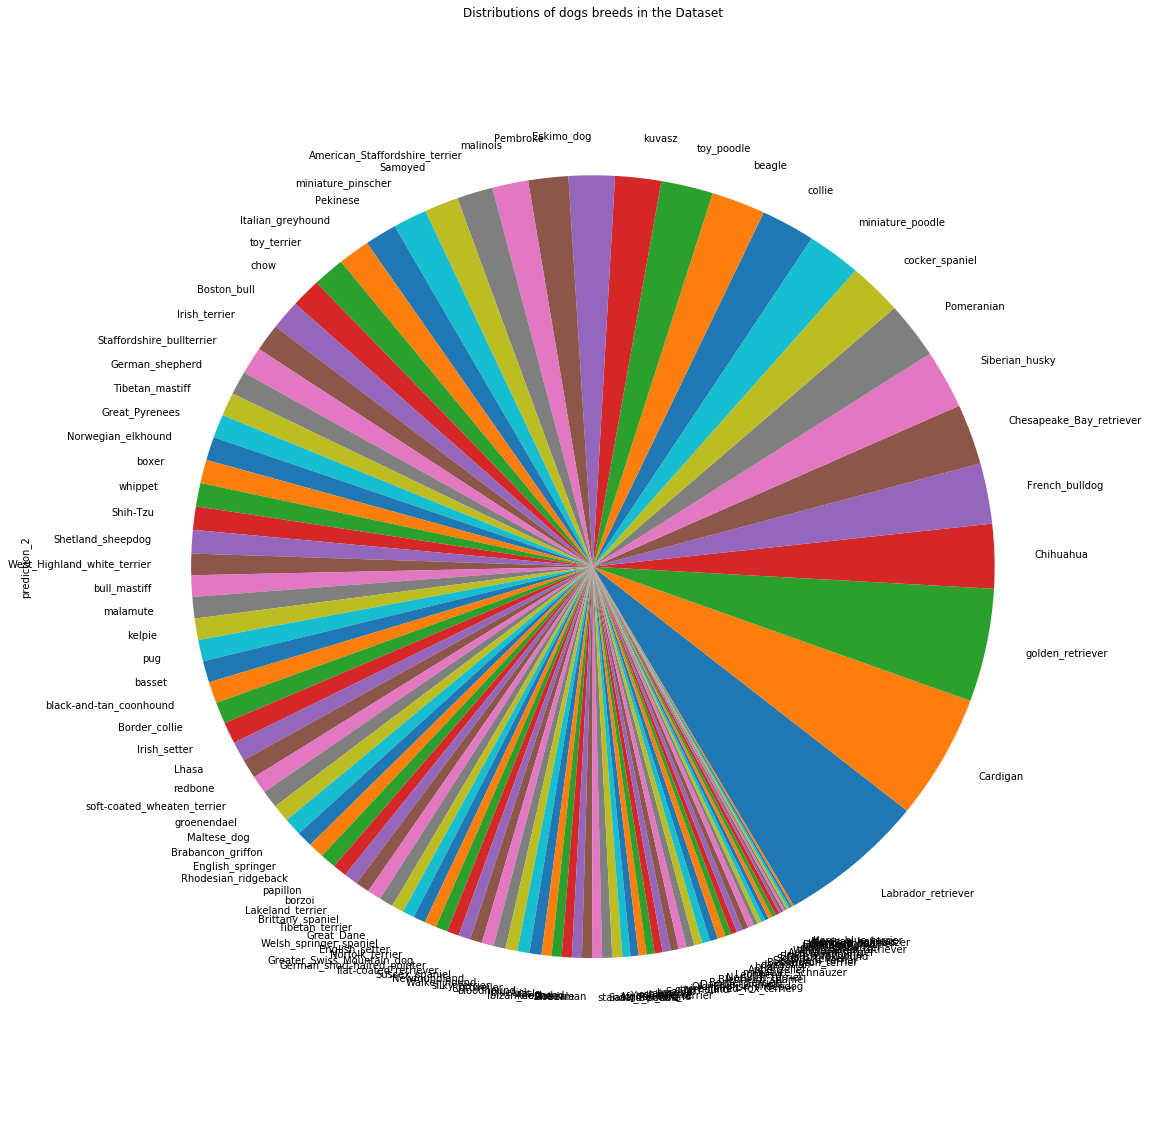

In [139]:
plt.rcParams['figure.figsize']=(20,20)

Tweets_df.prediction_2.value_counts(sort=True).plot.pie(startangle=300, pctdistance=0.9, radius = 0.9)
plt.title('Distributions of dogs breeds in the Dataset')
plt.show()

## Visualizing the dogs breeds 3 of dataset

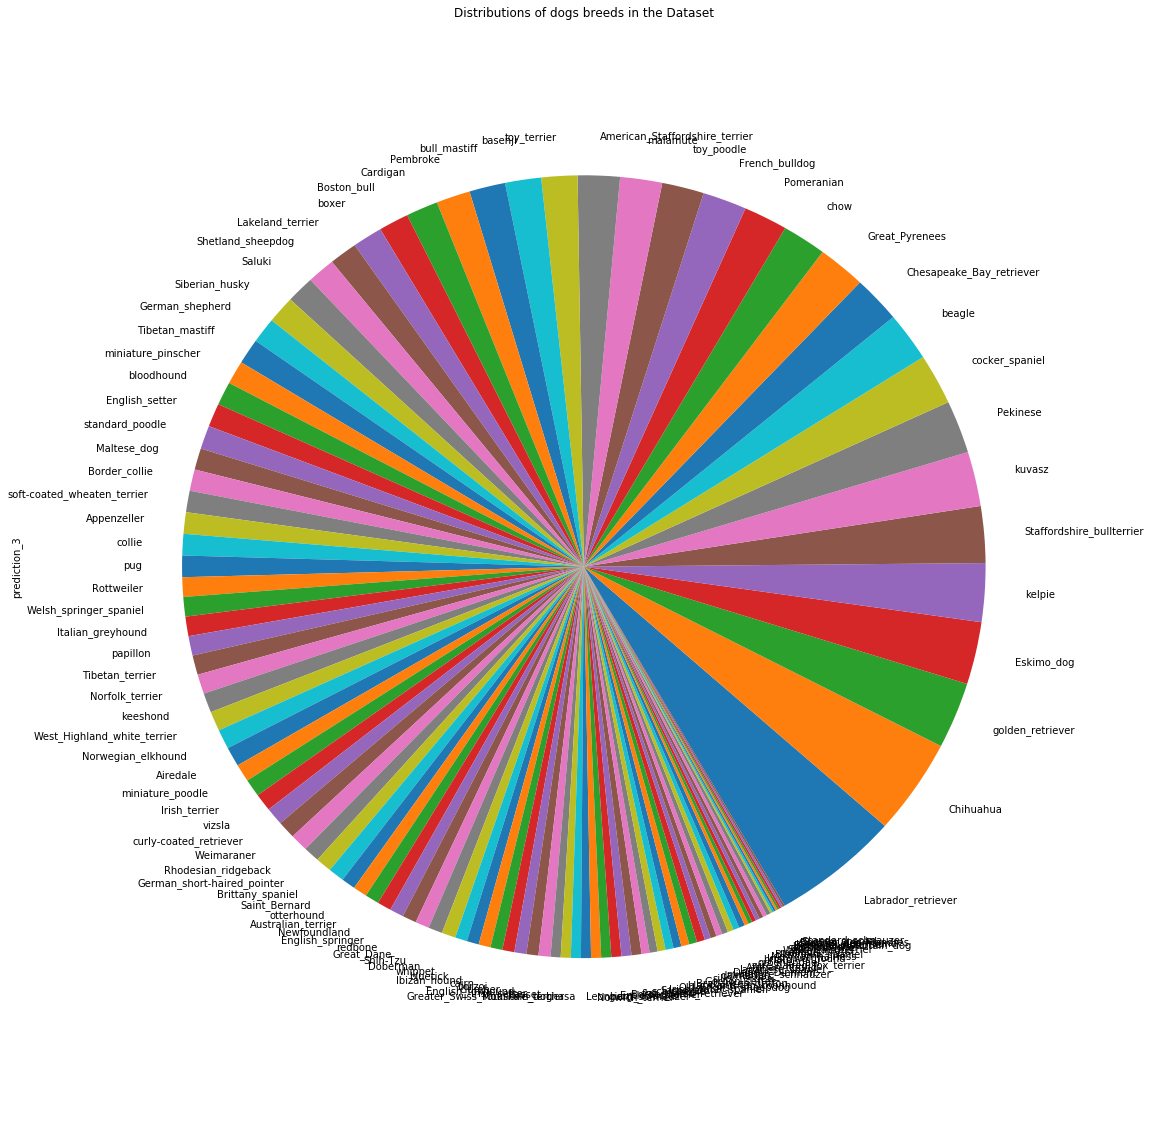

In [140]:
plt.rcParams['figure.figsize']=(20,20)

Tweets_df.prediction_3.value_counts(sort=True).plot.pie(startangle=300, pctdistance=0.9, radius = 0.9)
plt.title('Distributions of dogs breeds in the Dataset')
plt.show()